In [334]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


Get Credit Card Data from book "Econometric Analysis".    
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

In [335]:
# Input the data from the URL.
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv"
!wget $data # Get the data.

--2022-10-06 21:47:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv.16’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.002s  

2022-10-06 21:47:49 (31.5 MB/s) - ‘AER_credit_card_data.csv.16’ saved [73250/73250]



In [336]:
df = pd.read_csv('AER_credit_card_data.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [337]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [338]:
# check for null values
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

Create the target variable by mapping yes to 1 and no to 0.

In [339]:
df.card = df.card.replace(['yes','no'],[1,0])
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [340]:
df.dtypes    # check "card" column changed from object to numerical

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [341]:
# get numerical vs categorical variables
numerical=['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
categorical=['owner', 'selfemp']
len(numerical), len(categorical)

(9, 2)

Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [342]:
# first split 80-20
df_full_train, df_test = train_test_split (df, test_size=0.2, random_state=1) 

# Now, split 60-20 from this 80%
df_train, df_val = train_test_split (df_full_train, test_size=0.25, random_state=1)   # 20% of the total = 25% of the 80%

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

len (df), len (df_full_train), len (df_train), len(df_test),  len (df_val)

(1319, 1055, 791, 264, 264)

- Accuracy =  TP / (TP+FP+TN+FN)
- Precision = TP / (TP+FP)
- Recall =    TP / (TP+FN)

CONFUSION TABLE:

TN  FP    
FN  TP

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate: TPR  = TP / (TP+FN)
- False Positive Rate: FPR  = FP / (FP+TN)



AUC = Area Under the Curve

In [343]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression


**QUESTION 1**
Which numerical variable (among the following 4) has the highest AUC?

- reports
- dependents
- active
- share

In [344]:
for feature in numerical:
    auc = roc_auc_score(y_train, df_train[feature])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[feature])
    print(feature, auc.round(3))

reports 0.717
age 0.524
income 0.591
share 0.989
expenditure 0.991
dependents 0.533
months 0.529
majorcards 0.534
active 0.604


ANSWER: share

Training the model


In [345]:
columns= ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
train_dict=df_train[columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train

array([[1.700000e+01, 4.050000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.990431e-04],
       [4.000000e+00, 3.233333e+01, 4.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.000000e-04],
       [7.000000e+00, 2.916667e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.820546e-02],
       ...,
       [1.000000e+00, 2.475000e+01, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 8.070774e-02],
       [7.000000e+00, 5.691667e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 6.289540e-02],
       [8.000000e+00, 2.458333e+01, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 5.454546e-04]])

In [346]:
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [347]:
val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]
y_pred.round(2)

array([1.  , 0.06, 1.  , 0.02, 1.  , 1.  , 0.07, 1.  , 1.  , 1.  , 0.14,
       1.  , 1.  , 1.  , 1.  , 0.01, 1.  , 1.  , 0.23, 1.  , 1.  , 1.  ,
       1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  ,
       0.  , 1.  , 1.  , 1.  , 0.17, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.  , 0.06, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.  , 0.17, 1.  , 1.  , 0.13, 1.  , 1.  ,
       0.14, 1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.13, 1.  , 1.  , 0.3 , 1.  , 0.02, 1.  ,
       1.  , 1.  , 1.  , 0.85, 1.  , 1.  , 1.  , 1.  , 1.  , 0.04, 0.04,
       1.  , 1.  , 0.99, 1.  , 0.1 , 1.  , 0.34, 1.  , 1.  , 1.  , 1.  ,
       1.  , 0.03, 1.  , 0.  , 0.3 , 0.16, 0.18, 1.  , 1.  , 1.  , 0.02,
       1.  , 1.  , 0.03, 1.  , 0.06, 1.  , 1.  , 1.  , 0.  , 1.  , 1.  ,
       0.12, 1.  , 0.96, 1.  , 1.  , 1.  , 1.  , 0.

**Question 2**

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995


In [348]:
roc_auc_score(y_val, y_pred).round(3)


0.995

**Question 3**

Now let's compute precision and recall for our model.

- Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

- 0.1
- 0.3
- 0.6
- 0.8

Precision = TP/(TP+FP)  

Recall = TP/(TP+FN)
​
 

In [349]:
def tpr_fpr_dataframe(y_val, y_pred):  #confusion matrix dataframe
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [350]:
df_pred = tpr_fpr_dataframe(y_val, y_pred)
df_pred[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,211,53,0,0,1.000000,1.000000
10,0.1,210,17,1,36,0.995261,0.320755
20,0.2,207,5,4,48,0.981043,0.094340
30,0.3,205,5,6,48,0.971564,0.094340
40,0.4,205,1,6,52,0.971564,0.018868
50,0.5,204,1,7,52,0.966825,0.018868
60,0.6,204,1,7,52,0.966825,0.018868
70,0.7,204,1,7,52,0.966825,0.018868
80,0.8,204,1,7,52,0.966825,0.018868
90,0.9,204,0,7,53,0.966825,0.000000


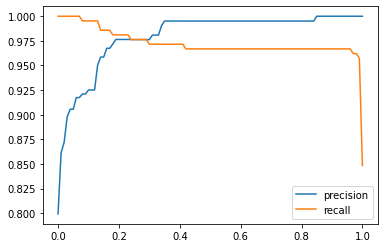

In [351]:
df_pred['p'] = df_pred.tp / (df_pred.tp + df_pred.fp)
df_pred['r'] = df_pred.tp / (df_pred.tp + df_pred.fn)

plt.plot(df_pred.threshold, df_pred.p, label='precision')
plt.plot(df_pred.threshold, df_pred.r, label='recall')

plt.legend()

Intersection is at about 0.3

**Question 4**

At which threshold F1 is maximal?

- 0.1
- 0.4
- 0.6
- 0.7

In [352]:
# formula for F1:
df_pred['f1'] = 2 * df_pred.p * df_pred.r / (df_pred.p + df_pred.r)


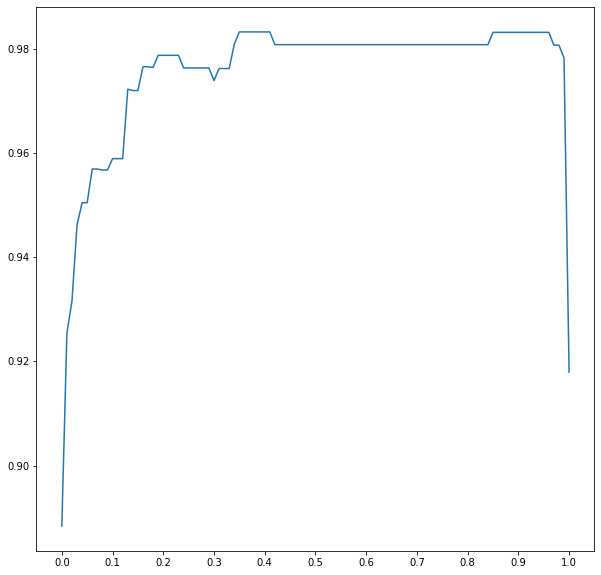

In [353]:
# plot f1 against threshold, max value is answer

plt.figure(figsize=(10, 10))

plt.plot(df_pred.threshold, df_pred.f1)
plt.xticks(np.linspace(0, 1, 11))    # better numbering for x-axis 

plt.show()

Closest Answer: 0.4

**Question 5**
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

- 0.003
- 0.014
- 0.09
- 0.24


In [354]:
from sklearn.model_selection import KFold

# turn trining ito a function
def train(df_train, y_train, C):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

# turn prediction into a function
def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [359]:
def getScores (C):
  scores = []

  kfold = KFold(n_splits=5, shuffle=True, random_state=1)

  # for each of the folds do the training and the prediction
  for train_idx, val_idx in kfold.split(df_full_train):
      df_train = df_full_train.iloc[train_idx]
      df_val = df_full_train.iloc[val_idx]

      y_train = df_train.card.values
      y_val = df_val.card.values

      dv, model = train(df_train, y_train, C)
      y_pred = predict(df_val, dv, model)

      auc = roc_auc_score(y_val, y_pred)
      scores.append(auc)

  print (scores)
  print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

In [360]:
getScores(C=1.0)

[0.9941860465116279, 0.9941176470588236, 0.9943346508563901, 0.9996107939802803, 1.0]
0.996 +- 0.003


ANSWER: 0.003

**Question 6**

Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [362]:
for C in [0.01, 0.1, 1, 10]:
  print ("C=",C)
  getScores(C=C)

C= 0.01
[0.98421926910299, 0.9875, 0.9922266139657444, 0.9954592631032693, 1.0]
0.992 +- 0.006
C= 0.1
[0.9900332225913621, 0.991421568627451, 0.9948616600790514, 0.9989621172807472, 1.0]
0.995 +- 0.004
C= 1
[0.9941860465116279, 0.9941176470588236, 0.9943346508563901, 0.9996107939802803, 1.0]
0.996 +- 0.003
C= 10
[0.9934939091915835, 0.9942401960784313, 0.9945981554677206, 0.9996107939802803, 1.0]
0.996 +- 0.003


ANSWER: C=1